Цель:
Вспомнить и применить знания, полученные на протяжении всего курса. Получить полноценную работу, объединяющую в себе основные методики по работе с данными и алгоритмы машинного обучения.
Описание задания:
В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
col_name = ['name','landmass', 'quadrant','area','population','language','religion','bars_vert', 'strip_horizont','color_num',\
            'red','green','blue','gold','white','black','orange', 'mainhue','circles','crosses','saltires','quarters',\
            'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text' , 'topleft', 'botright' ]
"""
2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
 3. zone	Geographic quadrant, based on Greenwich and the Equator
                1=NE, 2=SE, 3=SW, 4=NW
4. area	in thousands of square km 
5. population	in round millions
6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 
               Indo-European, 7=Chinese, 8=Arabic, 
               9=Japanese/Turkish/Finnish/Magyar, 10=Others

   7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others
 8. bars     Number of vertical bars in the flag               
   9. stripes  Number of horizontal stripes in the flag
  10. colours  Number of different colours in the flag
  11. red      0 if red absent, 1 if red present in the flag
  12. green    same for green
  13. blue     same for blue
  14. gold     same for gold (also yellow)
  
    15. white    same for white
  16. black    same for black
17. orange   same for orange (also brown)
  18. mainhue  predominant colour in the flag (tie-breaks decided by taking
               the topmost hue, if that fails then the most central hue,
               and if that fails the leftmost hue)
  19. circles  Number of circles in the flag
  20. crosses  Number of (upright) crosses
  21. saltires Number of diagonal crosses
  22. quarters Number of quartered sections
  23. sunstars Number of sun or star symbols
  
  24. crescent 1 if a crescent moon symbol present, else 0
  25. triangle 1 if any triangles present, 0 otherwise
  26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
  27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)
               present, 0 otherwise
  28. text     1 if any letters or writing on the flag (e.g., a motto or
               slogan), 0 otherwise
  29. topleft  colour in the top-left corner (moving right to decide 
               tie-breaks)
  30. botright Colour in the bottom-left corner (moving left to decide 
               tie-breaks)

8. Missing values: None  
"""
df_data_0 = pd.read_csv('/content/flag_data.csv', names = col_name,index_col = ['name'])
df_data_0.head()

,landmass,quadrant,area,population,language,religion,bars_vert,strip_horizont,color_num,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,...,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,...,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,...,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,blue,red


2. Проведите первичный разведочный анализ данных.
a) Проверьте данные на пропуски.
b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
c) Визуализируйте распределение количества флагов по религиям.

In [ ]:
# пкреведу цветовые значения topleft и botright

df_data = pd.get_dummies(df_data_0,columns=['mainhue','topleft', 'botright'],drop_first=True)
df_data.head()

,landmass,quadrant,area,population,language,religion,bars_vert,strip_horizont,color_num,red,...,topleft_orange,topleft_red,topleft_white,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,5,1,648,16,10,2,0,3,5,1,...,0,0,0,0,0,0,1,0,0,0
Albania,3,1,29,3,6,6,0,0,3,1,...,0,1,0,0,0,0,0,0,1,0
Algeria,4,1,2388,20,8,2,2,0,3,1,...,0,0,0,0,0,0,0,0,0,1
American-Samoa,6,3,0,0,1,1,0,0,5,1,...,0,0,0,0,0,0,0,0,1,0
Andorra,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# a
df_data.isna().sum().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


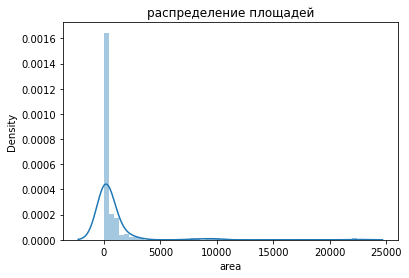

In [ ]:
# b
sns.distplot(df_data['area'])
plt.title('распределение площадей');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


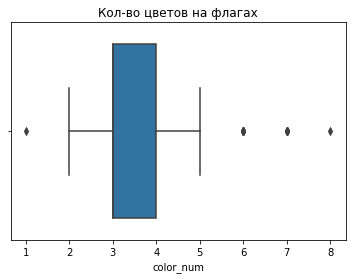

In [ ]:
sns.boxplot(df_data['color_num'])
plt.title('Кол-во цветов на флагах');

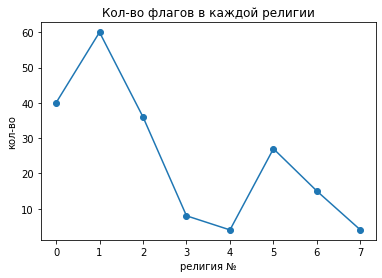

In [ ]:
# c
plt.plot(df_data.groupby(['religion'])['religion'].count(), marker='o')

plt.title('Кол-во флагов в каждой религии')
plt.ylabel('кол-во')
plt.xlabel('религия №');

In [ ]:
df_data['religion'].value_counts(normalize=True)
# данные не сбалансированы.
# очень мало 3, 4 и 7 религии

1    0.309278
0    0.206186
2    0.185567
5    0.139175
6    0.077320
3    0.041237
4    0.020619
7    0.020619
Name: religion, dtype: float64

In [ ]:
df_data['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
4     4
7     4
Name: religion, dtype: int64

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(columns=['religion']),df_data['religion'], test_size = 0.2, random_state = 17)
X_train_1 = X_train.copy()
X_train_all_in_one = X_train.copy()

In [ ]:
y_train.value_counts()

1    49
0    31
2    25
5    25
6    12
3     7
7     3
4     3
Name: religion, dtype: int64

4. Обучите любую модель классификации на выбор.

In [ ]:
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
# model_svc = SVC()
model_svc = SVC(random_state=7)
# model_svc = make_pipeline(StandardScaler(),SVC())

model_svc.fit(X_train_1,y_train)


SVC(random_state=7)

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_svc.predict(X_test)
res = classification_report(y_test,y_pred, output_dict=True)
res_all = {}
res_all['start'] = res['accuracy']
print(res['accuracy'])

0.2564102564102564


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a) Сделайте выводы.

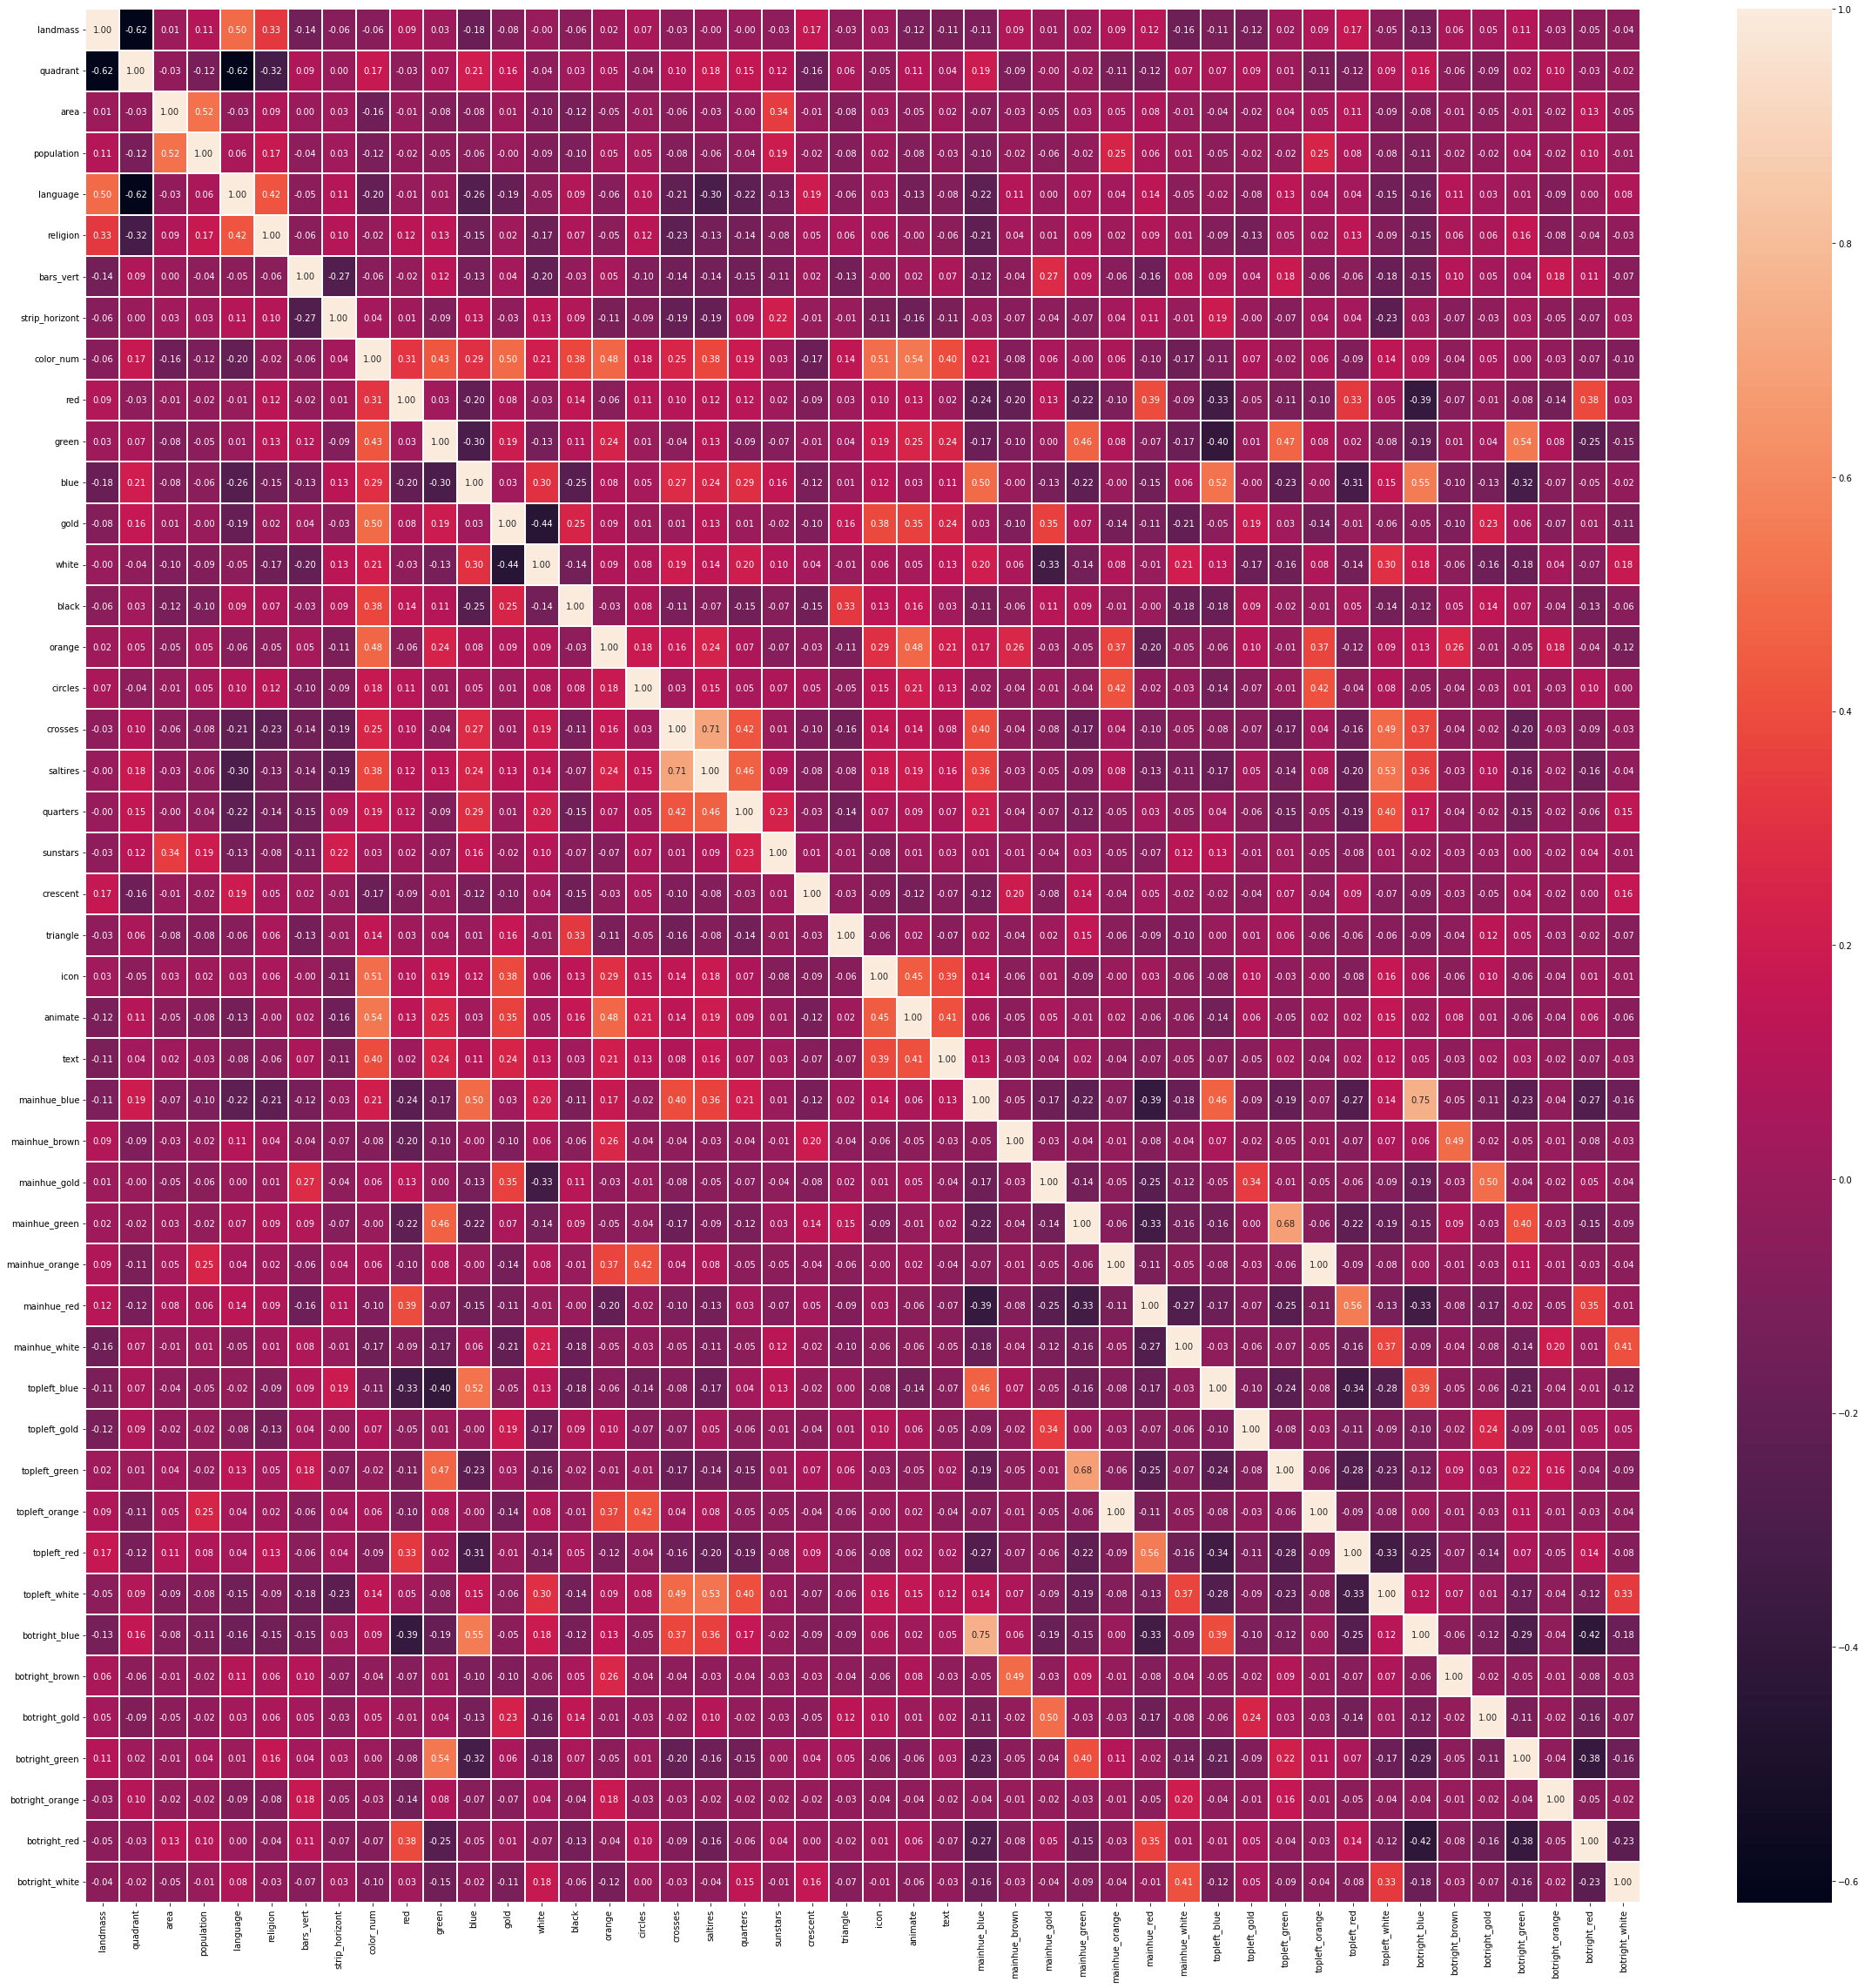

In [ ]:
corr = df_data.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr,annot=True, fmt='.2f', linewidths = 2)
plt.show()
# landmass, quadrant и  language оказывают большее влеяние на религию, чем атрибуты связанные непосредственно с флагом
#  из втрибута флага я отметила только croses и mainhue_blue (0.2+)
# mainhue_orange и topleft_orange - взаимозаменяемые

7. Обработайте выбросы в данных.
a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.
b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

In [ ]:
X_train_1.columns
# в категориальных признаках ничего интересного не нашла

Index(['landmass', 'quadrant', 'area', 'population', 'language', 'bars_vert',
       'strip_horizont', 'color_num', 'red', 'green', 'blue', 'gold', 'white',
       'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters',
       'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text',
       'mainhue_blue', 'mainhue_brown', 'mainhue_gold', 'mainhue_green',
       'mainhue_orange', 'mainhue_red', 'mainhue_white', 'topleft_blue',
       'topleft_gold', 'topleft_green', 'topleft_orange', 'topleft_red',
       'topleft_white', 'botright_blue', 'botright_brown', 'botright_gold',
       'botright_green', 'botright_orange', 'botright_red', 'botright_white'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strip_horizont'>

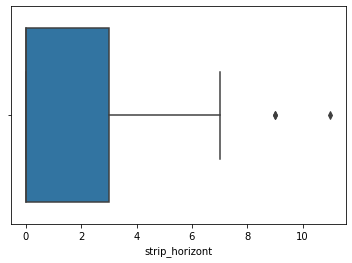

In [ ]:
sns.boxplot(X_train_1['strip_horizont'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bars_vert'>

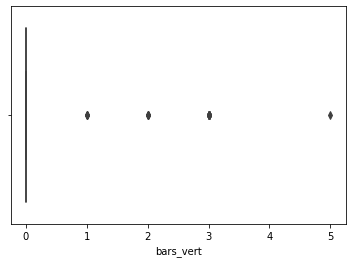

In [ ]:
sns.boxplot(X_train_1['bars_vert'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

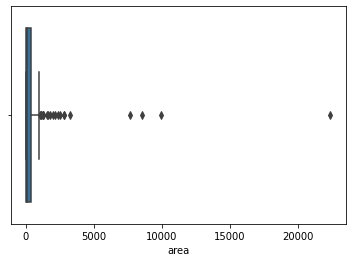

In [ ]:
sns.boxplot(X_train_1['area'])
# надо отрезать ссср =(

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

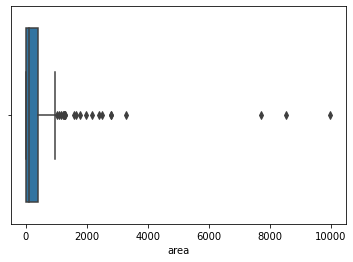

In [ ]:
X_train_1.drop('USSR', axis = 0, inplace = True)
sns.boxplot(X_train_1['area'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

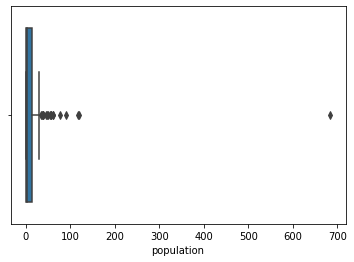

In [ ]:
sns.boxplot(X_train_1['population'])
# Индию и Китай удалим, их итак слишком много

In [ ]:
X_train_1[X_train_1['population'] > 400]

,landmass,quadrant,area,population,language,bars_vert,strip_horizont,color_num,red,green,...,topleft_orange,topleft_red,topleft_white,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
name,,,,,,,,,,,,,,,,,,,,,
India,5,1,3268,684,6,0,3,4,0,1,...,1,0,0,0,0,0,1,0,0,0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='population'>

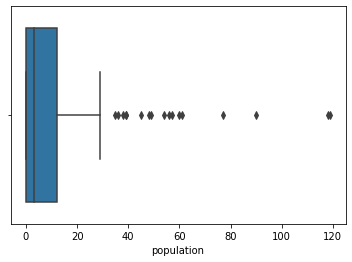

In [ ]:
X_train_1.drop(['India'], axis = 0, inplace = True)
sns.boxplot(X_train_1['population'])

In [ ]:
# и удалю строки из y_traina заодно
y_train.drop(['USSR','India'],axis = 0, inplace=True)
y_train


name
Argentine           0
Bermuda             1
Montserrat          1
Dominica            1
American-Samoa      1
                   ..
Fiji                1
Singapore           3
Papua-New-Guinea    5
Rwanda              5
Mauritius           4
Name: religion, Length: 153, dtype: int64

8. Проведите нормализацию признаков.
a) Выберите признаки для нормализации, предложите способы для их обработки.

In [ ]:
X_train = X_train_1.copy()
from sklearn.preprocessing import StandardScaler #стандартизирует признак вычитая среднее и затем масштабируя к единчной дисперсии
from sklearn.preprocessing import MinMaxScaler #что MinMaxScaler не снижает важность выбросов.
# df_data.describe()
#нормализировать необходимо: area и  population
# name_scal = ['area', 'population']
name_all = X_train.columns
scaler = StandardScaler()
scaler.fit(X_train)
scal = scaler.transform(X_train)
df_scal = pd.DataFrame(scal, columns = name_all)
X_train.loc[:,'area'] = list(df_scal['area'])
X_train.loc[:,'population'] = list(df_scal['population'])

scal_test = scaler.transform(X_test)
df_scal_test = pd.DataFrame(scal_test, columns = name_all)
X_test.loc[:,'area'] = list(df_scal_test['area'])
X_test.loc[:,'population'] = list(df_scal_test['population'])




In [ ]:
X_train.describe()

,landmass,quadrant,area,population,language,bars_vert,strip_horizont,color_num,red,green,...,topleft_orange,topleft_red,topleft_white,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
count,153.000000,153.000000,1.530000e+02,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0,153.000000,153.000000
mean,3.575163,2.254902,-7.981996e-18,-1.161018e-17,5.150327,0.398693,1.470588,3.562092,0.790850,0.470588,...,0.019608,0.281046,0.241830,0.261438,0.013072,0.052288,0.176471,0.0,0.359477,0.084967
std,1.575690,1.300452,1.003284e+00,1.003284e+00,3.568450,0.995648,2.064929,1.336876,0.408038,0.500773,...,0.139104,0.450986,0.429598,0.440861,0.113956,0.223337,0.382472,0.0,0.481423,0.279749
min,1.000000,1.000000,-3.815033e-01,-5.579132e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,1.000000,-3.784259e-01,-5.579132e-01,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,4.000000,2.000000,-3.099526e-01,-4.103154e-01,6.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,5.000000,4.000000,-9.530040e-02,3.247794e-02,8.000000,0.000000,3.000000,4.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,6.000000,4.000000,7.293658e+00,5.296799e+00,10.000000,5.000000,11.000000,8.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


9. Повторите п. 4, п. 5.

In [ ]:
model_svc_scal = SVC(random_state=7)
# model_svc = make_pipeline(StandardScaler(),SVC())
# model_knn = KNeighborsClassifier(n_neighbors = 7)
model_svc_scal.fit(X_train,y_train)
# ну я удалила 3 строки x_поезда ()

y_pred = model_svc_scal.predict(X_test)
res = classification_report(y_test,y_pred, output_dict=True)
res_all['scaler'] = res['accuracy']
print(res)

{'0': {'precision': 0.6, 'recall': 0.6666666666666666, 'f1-score': 0.631578947368421, 'support': 9}, '1': {'precision': 0.42857142857142855, 'recall': 0.5454545454545454, 'f1-score': 0.4799999999999999, 'support': 11}, '2': {'precision': 0.5714285714285714, 'recall': 0.36363636363636365, 'f1-score': 0.4444444444444444, 'support': 11}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '5': {'precision': 0.25, 'recall': 1.0, 'f1-score': 0.4, 'support': 2}, '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'accuracy': 0.46153846153846156, 'macro avg': {'precision': 0.23124999999999998, 'recall': 0.32196969696969696, 'f1-score': 0.24450292397660817, 'support': 39}, 'weighted avg': {'precision': 0.4333333333333333, 'recall': 0.46153846153846156, 'f1-score': 0.42700254910781227, 'support': 39}}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10.Сбалансируйте классы путем oversampling/undersampling.
a) Повторите п. 4, п. 5.

In [ ]:
y_train.value_counts()

"""
очень странно, минимальное кол-во классов ==2,
но ни при значении n_neighbors=2 smote кидает ошибку в недостатке соседей
=> оставила по одному соседу, но в моих глазах метод потерял логику.
надеюсь он умнее меня и 1 соседа ему достаточно =)

https://stackoverflow.com/questions/49395939/smote-initialisation-expects-n-neighbors-n-samples-but-n-samples-n-neighbo
"""

'\nочень странно, минимальное кол-во классов ==2,\nно ни при значении n_neighbors=2 smote кидает ошибку в недостатке соседей\n=> оставила по одному соседу, но в моих глазах метод потерял логику.\nнадеюсь он умнее меня и 1 соседа ему достаточно =)\n\nhttps://stackoverflow.com/questions/49395939/smote-initialisation-expects-n-neighbors-n-samples-but-n-samples-n-neighbo\n'

In [ ]:
y_train.value_counts()

1    49
0    31
2    25
5    25
6    11
3     7
7     3
4     2
Name: religion, dtype: int64

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# Оверсэмплинг со SMOTE:
"""
В SMOTE (Способ Передискретизации Синтезированных Меньшинств) 
мы создаём элементы в непосредственной близости от уже существующих в меньшем наборе.
"""

# общая тренировочная, на которую лягут все преобразования:
# на старом traine уже масштабирование
# X_train_all_in_one = X_train.copy()

# X_train = X_train_1.copy()

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=7, k_neighbors=1)
# smote_all = SMOTE(sampling_strategy='minority', random_state=17, k_neighbors=1)

X_train, y_train = smote.fit_resample(X_train, y_train)

# X_sm_all, y_sm_all = smote_all.fit_resample(X_train_all_in_one, y_train)

# к тесту не надо применять

In [ ]:
y_train.value_counts()

1    49
4    49
0    31
2    25
5    25
6    11
3     7
7     3
Name: religion, dtype: int64

In [ ]:
model_svc_smote = SVC(random_state=7)
# model_svc = make_pipeline(StandardScaler(),SVC())
# model_knn = KNeighborsClassifier(n_neighbors = 7)
model_svc_smote.fit(X_train, y_train)


y_pred = model_svc_smote.predict(X_test)
res = classification_report(y_test,y_pred, output_dict=True)

res_all['smote_x1'] = res['accuracy']
print(res['accuracy'])

0.4358974358974359


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# # можно ли несколько раз делать ???
# smote = SMOTE(sampling_strategy='minority', random_state=7, k_neighbors=2)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

1    49
4    49
0    31
2    25
5    25
6    11
3     7
7     3
Name: religion, dtype: int64

In [ ]:
# model_svc_smote = SVC(random_state=7)
# # model_svc = make_pipeline(StandardScaler(),SVC())
# # model_knn = KNeighborsClassifier(n_neighbors = 7)
# model_svc_smote.fit(X_train, y_train)


# y_pred = model_svc_smote.predict(X_test)
# res = classification_report(y_test,y_pred, output_dict=True)

# res_all['smote_x2'] = res['accuracy']
# print(res['accuracy'])

In [ ]:
X_train.shape

(200, 45)

11. Уменьшите размерность пространства признаков.
a) Повторите п. 4, п. 5.

In [ ]:
# избавлюсь от низко вариативных признаков
# он удаляет все объекты, где дисперсия вдоль столбца не превышает пороговое значение. 
# X_train = X_train_1.copy()
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.15)
X_train = var_thres.fit_transform(X_train,y_train)
X_test = var_thres.transform(X_test)
model_svc_vari = SVC()
model_svc_vari.fit(X_train,y_train)
y_pred = model_svc_vari.predict(X_test)
res = classification_report(y_test,y_pred, output_dict=True)
res_all['VarianceThreshold'] = res['accuracy']
print(res['accuracy'])
# осталост 23 признаков (22 удалил)

0.48717948717948717


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12. Примените любой метод на ваше усмотрение для отбора признаков.
a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.

In [ ]:
X_train.shape

(200, 23)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# 10
# 14 0.46153846153846156
# 15 0.48717948717948717
#  16 0.46153846153846156

In [ ]:
# X_train = X_train_1.copy()
# 0.48717948717948717 до РСА == 23комп

model_svc_pca = SVC()
model_svc_pca.fit(X_train,y_train)

y_pred = model_svc_pca.predict(X_test)
res = classification_report(y_test,y_pred, output_dict=True)
res_all['pca'] = res['accuracy']
print(res['accuracy'])


0.48717948717948717


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


13.Оптимизируйте параметры модели из п. 4.
a) Повторите п. 4, п. 5.

In [ ]:
# X_train = X_train_1.copy()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
model_svc = SVC(random_state=7, gamma = 'auto')

# model_all = make_pipeline(StandardScaler(),SMOTE(sampling_strategy='minority', random_state=7, k_neighbors=1),PCA(n_components=5),VarianceThreshold(threshold=0.2),model_svc)

param_grid = dict(C=list(np.arange(0,2,1)), kernel = ['linear','rbf','sigmoid'], degree = list(np.arange(0,2,0.5)),  coef0 = list(np.arange(-1,2,0.5)))
random_on_svc = RandomizedSearchCV(estimator = model_svc, param_distributions=param_grid, n_iter = 50, cv = 3, scoring='accuracy',n_jobs=-1, random_state=0)
grid = GridSearchCV(model_svc,param_grid, cv=3,scoring = 'accuracy',n_jobs=-1)
# grid.fit(X_train,y_train)

In [ ]:
# обучаю на отбборных 15 признаках
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 189, in

GridSearchCV(cv=3, estimator=SVC(gamma='auto', random_state=7), n_jobs=-1,
             param_grid={'C': [0, 1], 'coef0': [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5],
                         'degree': [0.0, 0.5, 1.0, 1.5],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
est_greed_on_svc = grid.best_estimator_
print(est_greed_on_svc)
y_pred_greed_on_svc = est_greed_on_svc.predict(X_test)
res = classification_report(y_test,y_pred_greed_on_svc, output_dict=True)
res_all['grid_on_svc'] = res['accuracy']
print(res['accuracy'])

0.6650082918739635
{'C': 1, 'coef0': -1.0, 'degree': 0.0, 'kernel': 'rbf'}
SVC(C=1, coef0=-1.0, degree=0.0, gamma='auto', random_state=7)
0.48717948717948717


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
random_on_svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
81 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 189, in s

RandomizedSearchCV(cv=3, estimator=SVC(gamma='auto', random_state=7), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'C': [0, 1],
                                        'coef0': [-1.0, -0.5, 0.0, 0.5, 1.0,
                                                  1.5],
                                        'degree': [0.0, 0.5, 1.0, 1.5],
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   random_state=0, scoring='accuracy')

In [ ]:
print(random_on_svc.best_score_)
print(random_on_svc.best_params_)
est_random_on_svc = random_on_svc.best_estimator_
print(est_random_on_svc)
y_pred = est_random_on_svc.predict(X_test)
res = classification_report(y_test,y_pred, output_dict=True)
res_all['grid_random_on_svc'] = res['accuracy']
print(res['accuracy'])

0.6650082918739635
{'kernel': 'rbf', 'degree': 0.0, 'coef0': 0.0, 'C': 1}
SVC(C=1, degree=0.0, gamma='auto', random_state=7)
0.48717948717948717


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


14. Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# три из работы или три любые? непонятно
est = [('random_grid', est_random_on_svc), ('forest', RandomForestClassifier()), ('LinearSVC', LinearSVC())]
stack_all = StackingClassifier(estimators=est)
stack_all.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinea

StackingClassifier(estimators=[('random_grid',
                                SVC(C=1, degree=0.0, gamma='auto',
                                    random_state=7)),
                               ('forest', RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

In [ ]:
res = classification_report(y_test,stack_all.predict(X_test), output_dict=True)
res_all['StackingClassifier'] = res['accuracy']
print(res['accuracy'])

0.41025641025641024


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pd.DataFrame.from_dict(res_all, orient = 'index').sort_values(by=0)

,0
start,0.256410
StackingClassifier,0.410256
smote_x1,0.435897
scaler,0.461538
VarianceThreshold,0.487179
pca,0.487179
grid_on_svc,0.487179
grid_random_on_svc,0.487179


15. Выберите результат с лучшими метриками и постройте для него Confusion Matrix.

In [ ]:
from sklearn.metrics.cluster import pair_confusion_matrix
pair_confusion_matrix(y_test,y_pred_greed_on_svc)

array([[910, 272],
       [184, 116]])

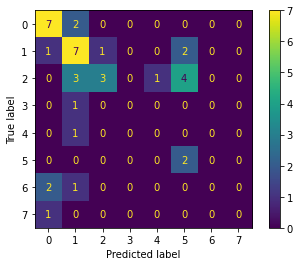

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_greed_on_svc, labels=est_greed_on_svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=est_greed_on_svc.classes_)
disp.plot()
plt.show()

16. *Творческий пункт. Предложите что-то интересное для датасета.

Сделайте выводы.

точность удалось улучшить на 23 % от начальной
кол-во признаков уменьшила с 45 до 15 без потери качества
Ни поиск по сеткам, ни стекинг из трёх моделей не дал прироста качества, StackingClassifier даже немного ухудшил его
 данные плохо сбалансированы. сожем ли мы синтезировать минорные данные бесконечно? при ещё одном применении smote теряла 1% в качестве, решила не оставлять.
 0=Catholic и 1=Other Christian предсказали лучше всего 

 Мой вывод, относительно данных:
 предсказать религию по флагу звучит странным и маловероятным, если вы не католики или  хрестьяны


Результат:
Реализована полноценная работа в области классического машинного обучения.